In [1]:
from itertools import product
import numpy as np
from matplotlib import pyplot as plt

## 2 Assets

In [2]:
def simulate_2_assets(r1, r2, std1, std2, rho, ef=False, rf_rate=0, title=None):
    # generate possible weights
    step_size = 0.01
    decimals = len(str(step_size).split('.')[1])
    possible_weights = np.arange(0, 1+step_size, step_size)
    
    # generate all possible weight combinations
    weight_combinations = list(product(possible_weights, repeat=2))
    
    # remove combinations that dont sum to 1
    weights = []
    for w in weight_combinations:
        w = np.round(w, decimals)
        if np.sum(w) == 1:
            weights.append(w)
        
    # for each weight combination, calculate expected return and standard deviation
    portfolios = {
        'weights': weights,
        'expected_returns': [],
        'standard_deviation': []
    }
    
    min_std = np.inf
    max_return = -np.inf

    for w in weights:
        exp_returns = w[0]*r1 + w[1]*r2
        std_returns = np.sqrt(w[0]**2*std1**2 + w[1]**2*std2**2 + 2*w[0]*w[1]*std1*std2*rho)
        
        if std_returns < min_std:
            min_std = std_returns
            min_std_return = exp_returns
        
        if exp_returns > max_return:
            max_return = exp_returns
            max_return_std = std_returns
        
        portfolios['expected_returns'].append(np.round(exp_returns, 4))
        portfolios['standard_deviation'].append(np.round(std_returns, 4))
    
    if ef:
        eff_front_r = [r for r in portfolios['expected_returns'] if r >= min_std_return]
        eff_front_std = [std for r, std in zip(portfolios['expected_returns'], portfolios['standard_deviation']) if r >= min_std_return]
        
    # capital market line
    if rf_rate > 0:
        v1 = r1 - rf_rate
        v2 = r2 - rf_rate       
        w1 = (v1*std2**2 - v2*rho*std1*std2) / (v1*std2**2 + v2*std1**2 - (v1+v2)*rho*std1*std2)
        w2 = 1 - w1
        
        tan_r = w1*r1 + w2*r2
        tan_std = np.sqrt(w1**2*std1**2 + w2**2*std2**2 + 2*w1*w2*std1*std2*rho)
        
        points = np.linspace(0, tan_std, 100)
        cml = [rf_rate + (tan_r - rf_rate) / tan_std * x for x in points]
        
    # Plot
    plt.figure(figsize=(8,6))
    if ef:
        plt.plot(eff_front_std, eff_front_r, color='m', label='Efficient Frontier', linestyle='--')
    if rf_rate > 0:
        plt.plot(points, cml, color='g', label='Capital Market Line')
        plt.scatter(tan_std, tan_r, color='g', marker='o', s=100, label='Tangency Portfolio')
    plt.scatter(portfolios['standard_deviation'], portfolios['expected_returns'], s=5)
    plt.scatter(min_std, min_std_return, color='r', marker='o', s=100, label=rf'Minimum $\sigma$ Portfolio')
    plt.scatter(max_return_std, max_return, color='y', marker='o', s=100, label=rf'Maximum $\mu$ Portfolio')
    plt.ylabel(rf'Expected Returns ($\mu$)')
    plt.xlabel(rf'Standard Deviation ($\sigma$)')
    if title:
        plt.title(title)
    else:
        plt.title(
            f'Expected Returns and Standard Deviations of Potential Portfolios \n'
            rf'Constructed from 2 Assets ($\rho$ = {rho}) with ($\mu_1$={r1}, $\sigma_1$={std1}) and ($\mu_2$={r2}, $\sigma_2$={std2})'
        )
    plt.legend()
    plt.show()

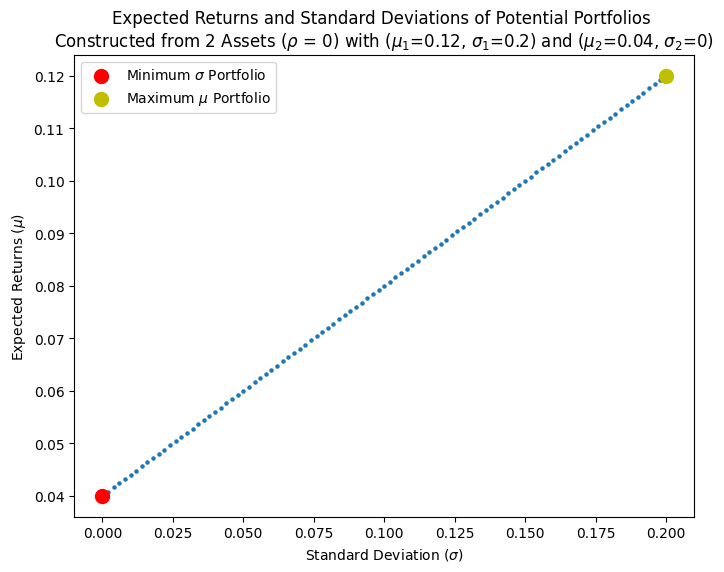

In [3]:
# 1 risky assets and 1 risk free asset
simulate_2_assets(0.12, 0.04, 0.2, 0, 0)

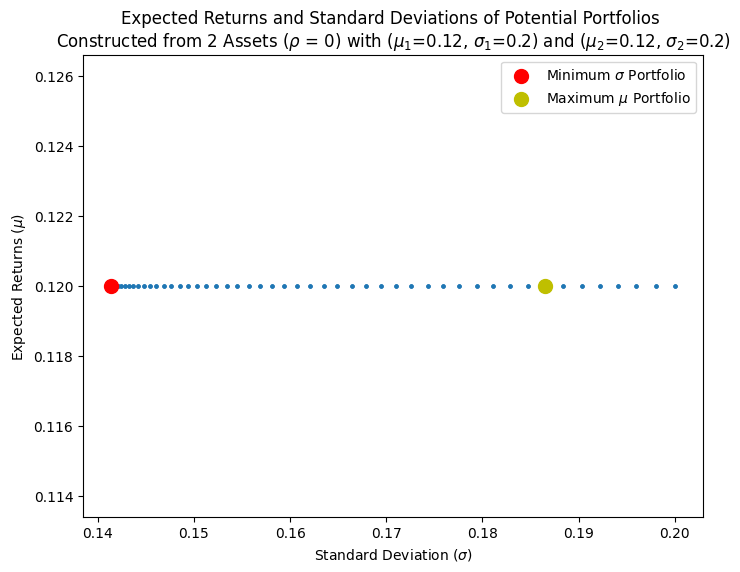

In [4]:
# 2 risky assets with equal returns and standard deviations but no correlation
simulate_2_assets(0.12, 0.12, 0.2, 0.2, 0)

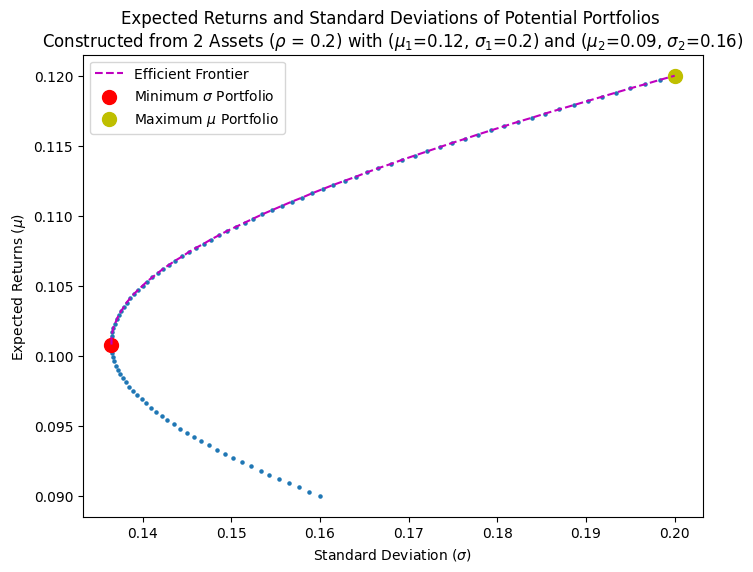

In [5]:
# 2 risky assets with different returns and standard deviations
simulate_2_assets(0.12, 0.09, 0.2, 0.16, 0.2, True)

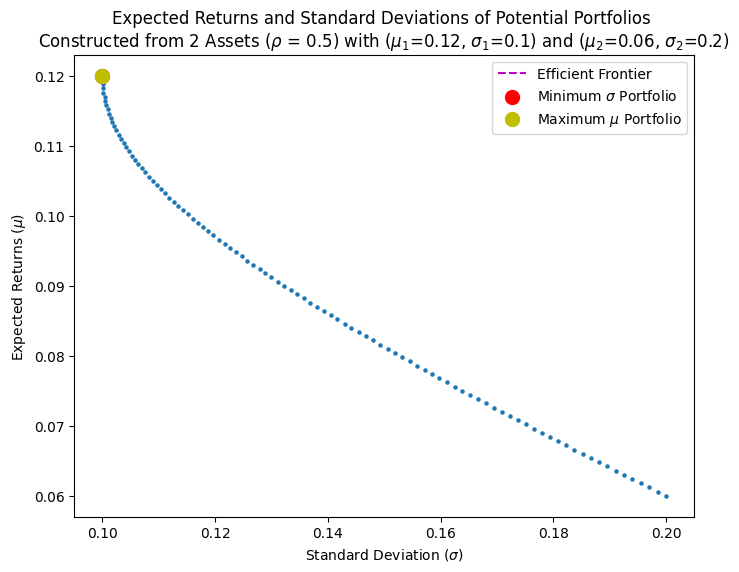

In [6]:
# 2 risky assets with one asset clearly better than the other
simulate_2_assets(0.12, 0.06, 0.1, 0.2, 0.5, True)

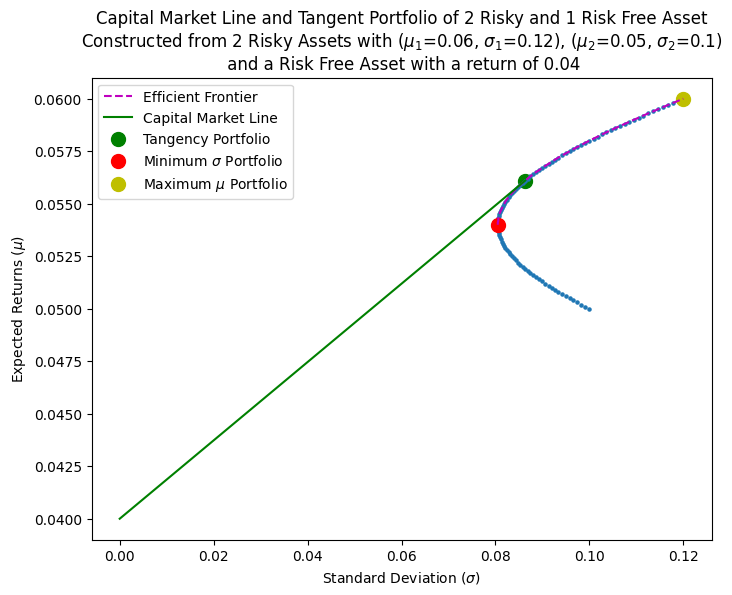

In [7]:
# tangent portfolio
risk_free_rate = 0.04
mu_1 = 0.06
mu_2 = 0.05
std_1 = 0.12
std_2 = 0.1

simulate_2_assets(
    mu_1, 
    mu_2, 
    std_1, 
    std_2, 
    0.1, 
    True, 
    risk_free_rate,
    (
        'Capital Market Line and Tangent Portfolio of 2 Risky and 1 Risk Free Asset\n'
        fr'Constructed from 2 Risky Assets with ($\mu_1$={mu_1}, $\sigma_1$={std_1}), ($\mu_2$={mu_2}, $\sigma_2$={std_2})'
        f'\n and a Risk Free Asset with a return of {risk_free_rate}'
     )
)